# This is a notebook for some testing

In [1]:
import os
import glob
import importlib.util

# Set current working directory
# Get the directory of the current notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

# Set the working directory to the project root (one level up from the notebook directory)
project_root = os.path.join(notebook_dir, os.pardir)
os.chdir(project_root)

project_dir = project_root

# You can verify the new working directory
print(f"Current Working Directory: {os.getcwd()}")


Current Working Directory: /home/timpi/Projects/thesis/multi_agent_supply_chain_optimization


In [4]:
from contrast_extract_mps_info import analyze_mps, analyze_mps_high_level
import pandas as pd

In [5]:
# Example usage:
file_path = os.path.join(project_dir, "CapacitatedFacilityLocation.mps")
mps_data = analyze_mps(file_path)

print(mps_data)

{'objective_function': {'name': 'TotalCost', 'coefficients': {'Open_0': 150.0, 'Open_1': 180.0, 'Open_2': 160.0, 'Open_3': 170.0, 'Open_4': 155.0, 'Serve_0_0': 10.0, 'Serve_0_1': 12.0, 'Serve_0_2': 15.0, 'Serve_0_3': 20.0, 'Serve_0_4': 18.0, 'Serve_1_0': 14.0, 'Serve_1_1': 11.0, 'Serve_1_2': 13.0, 'Serve_1_3': 16.0, 'Serve_1_4': 19.0, 'Serve_2_0': 13.0, 'Serve_2_1': 17.0, 'Serve_2_2': 12.0, 'Serve_2_3': 14.0, 'Serve_2_4': 15.0, 'Serve_3_0': 12.0, 'Serve_3_1': 15.0, 'Serve_3_2': 10.0, 'Serve_3_3': 18.0, 'Serve_3_4': 16.0, 'Serve_4_0': 11.0, 'Serve_4_1': 13.0, 'Serve_4_2': 14.0, 'Serve_4_3': 15.0, 'Serve_4_4': 17.0}}, 'constraints': {'Demand_0': {'type': 'G', 'coefficients': {'Serve_0_0': 1.0, 'Serve_0_1': 1.0, 'Serve_0_2': 1.0, 'Serve_0_3': 1.0, 'Serve_0_4': 1.0}}, 'Demand_1': {'type': 'G', 'coefficients': {'Serve_1_0': 1.0, 'Serve_1_1': 1.0, 'Serve_1_2': 1.0, 'Serve_1_3': 1.0, 'Serve_1_4': 1.0}}, 'Demand_2': {'type': 'G', 'coefficients': {'Serve_2_0': 1.0, 'Serve_2_1': 1.0, 'Serve_2_2'

In [6]:
df = pd.DataFrame.from_dict(mps_data, orient='index')
df = df.transpose()
df.head(20)
# print a subset of df
#df.sample(10)

,objective_function,constraints,rhs_values
name,TotalCost,NaN,NaN
coefficients,"{'Open_0': 150.0, 'Open_1': 180.0, 'Open_2': 1...",NaN,NaN
Demand_0,NaN,"{'type': 'G', 'coefficients': {'Serve_0_0': 1....",1.0
Demand_1,NaN,"{'type': 'G', 'coefficients': {'Serve_1_0': 1....",1.0
Demand_2,NaN,"{'type': 'G', 'coefficients': {'Serve_2_0': 1....",1.0
Demand_3,NaN,"{'type': 'G', 'coefficients': {'Serve_3_0': 1....",1.0
Demand_4,NaN,"{'type': 'G', 'coefficients': {'Serve_4_0': 1....",1.0
Capacity_0,NaN,"{'type': 'L', 'coefficients': {'Open_0': -80.0...",0.0
Capacity_1,NaN,"{'type': 'L', 'coefficients': {'Open_1': -90.0...",0.0
Capacity_2,NaN,"{'type': 'L', 'coefficients': {'Open_2': -70.0...",0.0


In [21]:
analyze_mps_high_level(file_path)

{'objective_function': {'name': 'TotalCost', 'num_coefficients': 30},
 'constraints': {'total': 36,
  'types': {'equality': 0, 'less_than_equal': 30, 'greater_than_equal': 6}},
 'rhs_values': {'total': 36,
  'sample': [('Demand_0', 1.0),
   ('Demand_1', 1.0),
   ('Demand_2', 1.0),
   ('Demand_3', 1.0),
   ('Demand_4', 1.0)]}}

In [26]:
import gzip
import pickle
from pathlib import Path
import numpy as np
import torch
import torch.nn.functional as F
import torch_geometric
from utils import load_gzip, load_json


class BipartiteNodeData(torch_geometric.data.Data):
    """
    This class encode a node bipartite graph observation as returned by the ecole.observation.NodeBipartite
    observation function in a format understood by the pytorch geometric data handlers.
    """

    def __init__(
        self,
        constraint_features,
        edge_indices,
        edge_features,
        variable_features,
        candidates,
        nb_candidates,
        candidate_choice,
        candidate_scores,
    ):
        super().__init__()
        self.constraint_features = constraint_features
        self.edge_index = edge_indices
        self.edge_attr = edge_features
        self.variable_features = variable_features
        self.candidates = candidates
        self.nb_candidates = nb_candidates
        self.candidate_choices = candidate_choice
        self.candidate_scores = candidate_scores

    def __inc__(self, key, value, store, *args, **kwargs):
        """
        We overload the pytorch geometric method that tells how to increment indices when concatenating graphs
        for those entries (edge index, candidates) for which this is not obvious.
        """
        if key == "edge_index":
            return torch.tensor(
                [[self.constraint_features.size(0)], [self.variable_features.size(0)]]
            )
        elif key == "candidates":
            return self.variable_features.size(0)
        else:
            return super().__inc__(key, value, *args, **kwargs)


class GraphDataset(torch_geometric.data.Dataset):
    """
    This class encodes a collection of graphs, as well as a method to load such graphs from the disk.
    It can be used in turn by the data loaders provided by pytorch geometric.
    """

    def __init__(self, sample_files, edge_nfeats=2):
        super().__init__(root=None, transform=None, pre_transform=None)
        self.sample_files = sample_files
        self.edge_nfeats = edge_nfeats

    def len(self):
        return len(self.sample_files)

    def get(self, index, nan_mask_val=0):
        """
        This method loads a node bipartite graph observation as saved on the disk during data collection.
        """
        sample = load_gzip(self.sample_files[index])
        sample_observation, sample_action, sample_action_set, sample_scores = sample
        
        constraint_features = sample_observation.row_features
        edge_indices = sample_observation.edge_features.indices.astype(np.int32)
        edge_features = np.expand_dims(sample_observation.edge_features.values, axis=-1)
        if self.edge_nfeats == 2:
            edge_features_norm = edge_features / np.linalg.norm(edge_features) 
            edge_features = np.concatenate((edge_features, edge_features_norm), axis=-1)
        variable_features = sample_observation.variable_features

        constraint_features = np.nan_to_num(constraint_features, nan=nan_mask_val)
        edge_features = np.nan_to_num(edge_features, nan=nan_mask_val)
        variable_features = np.nan_to_num(variable_features, nan=nan_mask_val)

        # We note on which variables we were allowed to branch, the scores as well as the choice
        # taken by strong branching (relative to the candidates)
        candidates = np.array(sample_action_set, dtype=np.int32)
        candidate_scores = np.array([sample_scores[j] for j in candidates])
        candidate_choice = np.where(candidates == sample_action)[0][0]

        graph = BipartiteNodeData(
            torch.FloatTensor(constraint_features),
            torch.LongTensor(edge_indices),
            torch.FloatTensor(edge_features),
            torch.FloatTensor(variable_features),
            torch.LongTensor(candidates),
            len(candidates),
            torch.LongTensor([candidate_choice]),
            torch.FloatTensor(candidate_scores)
        )

        # We must tell pytorch geometric how many nodes there are, for indexing purposes
        graph.num_nodes = constraint_features.shape[0] + variable_features.shape[0]

        return graph

ImportError: cannot import name 'load_gzip' from 'utils' (c:\Users\timpi\Documents\Ugent\Masterproef\multi_agent_supply_chain_optimization\utils.py)

In [28]:
import torch
from torch_geometric.data import Data

def load_pickle(path):
    with open(path, 'rb') as file:
        obj = pickle.load(file)
    return obj

obj = load_pickle("data_0.pkl")

print(obj)

data = torch.load()  # returns a Data (MyData) object
print(data.x_rows.shape, data.edge_index_rowcols.shape, data.label)


ModuleNotFoundError: No module named 'gap_data'

In [34]:
# load_data.py
import sys
import types
import torch
from torch_geometric.data import Data

# 1) Create a fake module named gap_data with the bare minimum class
gap_data = types.ModuleType("gap_data")
class MyData(Data):
    """Stub for the unpickled object."""
    pass
gap_data.MyData = MyData
# If there’s also MyDataWithLabels, stub it too:
gap_data.MyDataWithLabels = type("MyDataWithLabels", (Data,), {})

# 2) Inject that module into sys.modules so torch.load can find it
sys.modules["gap_data"] = gap_data

def load_pickle(path):
    with open(path, 'rb') as file:
        obj = pickle.load(file)
    return obj

obj = load_pickle("data_0.pkl")

print(obj)


print(obj.x_rows.shape)              # torch.Size([70, 29])
print(obj.x_cols.shape)              # torch.Size([824, 17])
print(obj.edge_index_rowcols.shape)  # torch.Size([2, 1648])
print(obj.edge_vals_rowcols.shape)   # torch.Size([1648, 2])

print(hasattr(obj, "label"), getattr(obj, "label", None))


MyData(x_rows=[70, 29], x_cols=[824, 17], edge_index_rowcols=[2, 1648], edge_vals_rowcols=[1648, 2])
torch.Size([70, 29])
torch.Size([824, 17])
torch.Size([2, 1648])
torch.Size([1648, 2])
False None


In [37]:
# load_data.py
import sys
import types
import pickle
import torch
import numpy as np
from torch_geometric.data import Data

# 1) Stub the pickled module & classes
gap_data = types.ModuleType("gap_data")
class MyData(Data): pass
gap_data.MyData = MyData
gap_data.MyDataWithLabels = type("MyDataWithLabels", (Data,), {})
sys.modules["gap_data"] = gap_data

# 2) Unpickle with pickle.load
with open("data_0.pkl", "rb") as f:
    data = pickle.load(f)

# 3) Convert tensors to numpy
x_rows   = data.x_rows.numpy()               # [#rows, row_feat_dim]
x_cols   = data.x_cols.numpy()               # [#cols, col_feat_dim]
edge_idx = data.edge_index_rowcols.numpy()   # [2, E]
edge_val = data.edge_vals_rowcols.numpy()    # [E, 2]  (take [:,0] for raw coeffs)

num_rows, row_dim = x_rows.shape
num_cols, col_dim = x_cols.shape

# 4) Build dense adjacency matrix using the raw coefficient (col 0 of edge_val)
adj = np.zeros((num_rows, num_cols), dtype=float)
for r, c, v in zip(edge_idx[0], edge_idx[1], edge_val[:,0]):
    adj[r, c] = v

# 5) Print out adjacency snippet
print(f"Adjacency matrix: {num_rows}×{num_cols}")
print("Top‑left 5×10 block of adj (raw coefficients):")
print(adj[:5, :10])

# 6) Flatten feature matrices into one long vector
vec_rows = x_rows.reshape(-1)    # length = num_rows * row_dim
vec_cols = x_cols.reshape(-1)    # length = num_cols * col_dim
full_vec = np.concatenate([vec_rows, vec_cols])
print(f"\nFeature vector length: {full_vec.size}")
print("First 20 elements of feature vector:")
print(full_vec[:20])


Adjacency matrix: 70×824
Top‑left 5×10 block of adj (raw coefficients):
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Feature vector length: 16038
First 20 elements of feature vector:
[0.         0.         1.         0.         0.         0.
 1.         0.         0.         0.         0.14142136 0.
 0.         0.         0.06067961 0.         0.         0.06067961
 1.         0.        ]


# Langchain LangGraph React agent testing

In [17]:
# Load environment variables
from typing import List, Dict, Any, Tuple, Annotated, TypedDict
from typing_extensions import TypedDict
from datetime import datetime

# LangGraph imports
from langgraph.graph import StateGraph, END, START
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

# LangChain imports for compatibility
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage, FunctionMessage, ToolMessage
from langchain_core.tools import Tool

# Environment and utility imports
from dotenv import load_dotenv
from pulp import LpStatus, LpStatusOptimal, LpStatusInfeasible

# Import utility functions from the original codebase
from utils import _replace, _read_source_code, _run_with_exec, _apply_model_modification, modify_and_run_model
load_dotenv()

True

In [18]:
from langgraph.prebuilt import create_react_agent
from langchain_core.tools import tool
from langchain_core.messages import SystemMessage

In [19]:
# Read the source code files
new_source_code = _read_source_code("capfacloc_model.py")
original_result = "{'status': 'Optimal', 'raw_status': 1, 'solution': {'Open_0': 1.0, 'Open_1': 0.0, 'Open_2': 1.0, 'Open_3': 0.0, 'Open_4': 0.0, 'Serve_0_0': 1.0, 'Serve_0_1': 0.0, 'Serve_0_2': 0.0, 'Serve_0_3': 0.0, 'Serve_0_4': 0.0, 'Serve_1_0': 0.0, 'Serve_1_1': 0.0, 'Serve_1_2': 1.0, 'Serve_1_3': 0.0, 'Serve_1_4': 0.0, 'Serve_2_0': 0.1, 'Serve_2_1': 0.0, 'Serve_2_2': 0.9, 'Serve_2_3': 0.0, 'Serve_2_4': 0.0, 'Serve_3_0': 0.0, 'Serve_3_1': 0.0, 'Serve_3_2': 1.0, 'Serve_3_3': 0.0, 'Serve_3_4': 0.0, 'Serve_4_0': 1.0, 'Serve_4_1': 0.0, 'Serve_4_2': 0.0, 'Serve_4_3': 0.0, 'Serve_4_4': 0.0}, 'total_cost': 366.1}"

# Define the system prompt template
SYSTEM_PROMPT = """
You are an AI assistant for supply chain optimization. You analyze the provided Python optimization model
and modify it based on the user's questions. You explain solutions from a PuLP Python solver.
You compare with the original objective value if you have it available.
You clearly report the numbers and explain the impact to the user.

your written code will be added to the line with substring:
"### DATA MANIPULATION CODE HERE ###"    
"### CONSTRAINT CODE HERE ###"

Before the modification, the model had the following results:
---ORIGINAL RESULT---
{original_result}
---

Below is the full source code of the supply chain model:
---SOURCE CODE---
```python
{source_code}
```
---
"""

formatted_prompt = SYSTEM_PROMPT.format(
    source_code=new_source_code,
    original_result=original_result
)

print("Formatted Prompt:")
print(formatted_prompt)

Formatted Prompt:

You are an AI assistant for supply chain optimization. You analyze the provided Python optimization model
and modify it based on the user's questions. You explain solutions from a PuLP Python solver.
You compare with the original objective value if you have it available.
You clearly report the numbers and explain the impact to the user.

your written code will be added to the line with substring:
"### DATA MANIPULATION CODE HERE ###"    
"### CONSTRAINT CODE HERE ###"

Before the modification, the model had the following results:
---ORIGINAL RESULT---
{'status': 'Optimal', 'raw_status': 1, 'solution': {'Open_0': 1.0, 'Open_1': 0.0, 'Open_2': 1.0, 'Open_3': 0.0, 'Open_4': 0.0, 'Serve_0_0': 1.0, 'Serve_0_1': 0.0, 'Serve_0_2': 0.0, 'Serve_0_3': 0.0, 'Serve_0_4': 0.0, 'Serve_1_0': 0.0, 'Serve_1_1': 0.0, 'Serve_1_2': 1.0, 'Serve_1_3': 0.0, 'Serve_1_4': 0.0, 'Serve_2_0': 0.1, 'Serve_2_1': 0.0, 'Serve_2_2': 0.9, 'Serve_2_3': 0.0, 'Serve_2_4': 0.0, 'Serve_3_0': 0.0, 'Serve_3

In [20]:
# Define the tool for model modification
modify_model_tool = Tool(
    name="update_model",
    func=modify_and_run_model,
    description="""
        "Use this tool to modify the model by adding constraints or data. "
        You must provide the input as a valid JSON object using double quotes for both keys and values. NEVER add ```json ```
        Example:
        {
        "ADD CONSTRAINT": "model += lpSum(variables[0, j] for j in range(len(demand))) <= 80, \\"Supply_Limit_Supplier_0\\""
        }
        or
        {
        "ADD DATA": "supply = [200, 300, 300]"
        }
        Do not use single quotes or Python-style dictionaries.
        The tool updates and executes the model and returns results."
    """,
)

@tool
def update_model(modification_json: dict|str) -> str:
    """Use this tool to modify the model by adding constraints or data. 
        Example:
        {"ADD CONSTRAINT": "model += lpSum(variables[0, j] for j in range(len(demand))) <= 80, \\"Supply_Limit_Supplier_0\\""}
        or
        {"ADD DATA": "supply = [200, 300, 300]"}
    """
    return modify_and_run_model(modification_json)

tools = [update_model]

In [21]:
model = ChatOpenAI(model="gpt-4o-mini")
langgraph_agent_executor = create_react_agent(model, tools,prompt=formatted_prompt)

In [12]:
query = "What happens if the capacity of the first facility is limited to 15?"

messages = langgraph_agent_executor.invoke({"messages": [("human", query)]})
{
    "input": query,
    "output": messages["messages"][-1].content,
}

{'input': 'What happens if the capacity of the first facility is limited to 15?',
 'output': 'It seems I\'m encountering issues when trying to update the model with the new capacity for the first facility. However, I can assist you with the logical reasoning behind what the changes would imply if we adjust the capacity of the first facility to 15.\n\n### Impact of Reducing Capacity\n\n1. **Current Capacity**:\n   - The original capacity of the first facility is 80. By reducing it to 15, it may not be able to meet the demand from some customers, depending on the allocation decisions made during optimization.\n\n2. **Constraints**: \n   - The capacity constraint for the first facility would change to:\n     ```python\n     model += lpSum(assignment[i, 0] * demands[i] for i in range(n_customers)) <= 15 * facility_open[0], "Updated_Capacity_0"\n     ```\n   - This means now only a total of 15 units can be served from this facility, which can impact the overall service levels and costs sign

In [23]:
for step in langgraph_agent_executor.stream(
    {"messages": [("human", query)]}, stream_mode="updates"
):
    print(step)

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_sx9xwnBndnWnyGspbfEUFaoP', 'function': {'arguments': '{"modification_json": "model += capacities[0] == 15, \\"Capacity_Limit_Facility_0\\""}', 'name': 'update_model'}, 'type': 'function'}, {'id': 'call_EjDoFkcklHPbI0qfLFGxueAg', 'function': {'arguments': '{"modification_json": "capacities[0] = 15"}', 'name': 'update_model'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 1337, 'total_tokens': 1412, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1280}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BPx4dCqfgyexeJN0fH22BkVeSbZ46', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-224e5a59-9221-48da-b6c3-f855265f5be8-0', 

## Sensitivity Analysis

In [2]:
# -------------------------------------------------------------------------
# 6. Visualization of Sobol Results
# -------------------------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from __future__ import annotations
import json, os, itertools, math, multiprocessing as mp
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpBinary, LpContinuous
from pulp import LpStatusOptimal, PULP_CBC_CMD, value

from SALib.sample import saltelli, morris as morris_sample
from SALib.analyze import sobol, morris as morris_analyze


BASE_PATH   = Path("multi_agent_supply_chain_optimization/data/capfacloc_data.json")
RESULT_PATH = Path("../results")
BASE_Z= 366.1  # Baseline objective value from the original model

# Load the Sobol results if not already in memory
sobol_results = pd.read_csv(RESULT_PATH/"sobol.csv")
sobol_samples = pd.read_csv(RESULT_PATH/"sobol_sample.csv")
z_saltelli = sobol_samples["objective_value"].values

In [3]:
# Get the parameters with highest sensitivity indices
# Sort by total effect (ST)
sorted_params = sobol_results.sort_values(by="ST", ascending=False)
top_params = sorted_params.head(4)  # Get top 4 parameters

print("Top 4 sensitive parameters:")
print(top_params[["parameter", "S1", "ST"]])

# Create the figure
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)

# Create the main subplot for model output distribution
ax_main = fig.add_subplot(gs[:, 0])

# Create smaller subplots for sensitivity indices
ax_s1_1 = fig.add_subplot(gs[0, 1])
ax_s1_2 = fig.add_subplot(gs[0, 2])
ax_st_1 = fig.add_subplot(gs[1, 1])
ax_st_2 = fig.add_subplot(gs[1, 2])

# Colors for visualization
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Main plot - Histogram of objective values
ax_main.hist(z_saltelli, bins=30, color='gray', alpha=0.7)
ax_main.axvline(BASE_Z, color='red', linestyle='--', label=f'Baseline: {BASE_Z:.2f}')
ax_main.set_xlabel('Objective Value')
ax_main.set_ylabel('Frequency')
ax_main.set_title('Distribution of Objective Values')
ax_main.legend()

# Function to create parameter value vs objective value plot
def plot_param_sensitivity(ax, param_name, sobol_type, color_idx):
    param_values = sobol_samples[param_name].values
    obj_values = sobol_samples["objective_value"].values
    
    # Sort by parameter value
    sorted_indices = np.argsort(param_values)
    sorted_params = param_values[sorted_indices]
    sorted_obj = obj_values[sorted_indices]
    
    # Bin the data to show trends more clearly
    num_bins = 20
    bin_edges = np.linspace(min(sorted_params), max(sorted_params), num_bins + 1)
    bin_means = np.zeros(num_bins)
    bin_stds = np.zeros(num_bins)
    
    for i in range(num_bins):
        bin_mask = (sorted_params >= bin_edges[i]) & (sorted_params < bin_edges[i + 1])
        if np.any(bin_mask):
            bin_means[i] = np.mean(sorted_obj[bin_mask])
            bin_stds[i] = np.std(sorted_obj[bin_mask])
    
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Plot the binned data
    ax.plot(bin_centers, bin_means, '-', color=colors[color_idx], 
            label=f"{param_name}")
    ax.fill_between(bin_centers, bin_means - bin_stds, bin_means + bin_stds, 
                   alpha=0.3, color=colors[color_idx])
    
    # Add Sobol index value
    sobol_value = sobol_results[sobol_results['parameter'] == param_name][sobol_type].values[0]
    ax.set_title(f"{sobol_type}: {sobol_value:.3f}")
    ax.set_xlabel(param_name)
    ax.set_ylabel('Objective Value')
    ax.legend(loc='best')

# Plot top 2 parameters by first-order effect (S1)
top_params_s1 = sobol_results.sort_values(by="S1", ascending=False).head(2)
plot_param_sensitivity(ax_s1_1, top_params_s1.iloc[0]['parameter'], 'S1', 0)
plot_param_sensitivity(ax_s1_2, top_params_s1.iloc[1]['parameter'], 'S1', 1)

# Plot top 2 parameters by total effect (ST)
top_params_st = sobol_results.sort_values(by="ST", ascending=False).head(2)
plot_param_sensitivity(ax_st_1, top_params_st.iloc[0]['parameter'], 'ST', 2)
plot_param_sensitivity(ax_st_2, top_params_st.iloc[1]['parameter'], 'ST', 3)

plt.suptitle('Sobol Sensitivity Analysis Results', fontsize=16)
plt.savefig(RESULT_PATH/"sobol_visualization.png", dpi=300, bbox_inches='tight')
plt.close()

# Create a simple bar plot of S1 and ST for all parameters
plt.figure(figsize=(12, 8))
top_n = 10  # Number of parameters to show

# Sort parameters by total effect
sorted_indices = np.argsort(sobol_results['ST'].values)[::-1][:top_n]
sorted_params = sobol_results.iloc[sorted_indices]

x = np.arange(len(sorted_params))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, sorted_params['S1'], width, label='First-Order (S1)', color='steelblue')
rects2 = ax.bar(x + width/2, sorted_params['ST'], width, label='Total Effect (ST)', color='darkorange')

# Add error bars using confidence intervals
ax.errorbar(x - width/2, sorted_params['S1'], yerr=sorted_params['S1_conf'], 
            fmt='none', ecolor='black', capsize=5)
ax.errorbar(x + width/2, sorted_params['ST'], yerr=sorted_params['ST_conf'], 
            fmt='none', ecolor='black', capsize=5)

ax.set_ylabel('Sensitivity Index')
ax.set_title('Sobol Sensitivity Indices for Top Parameters')
ax.set_xticks(x)
ax.set_xticklabels(sorted_params['parameter'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()
plt.savefig(RESULT_PATH/"sobol_indices_bar.png", dpi=300, bbox_inches='tight')
plt.close()



Top 4 sensitive parameters:
  parameter        S1        ST
4  demand_4  0.128857  0.388822
0  demand_0  0.113959  0.378355
3  demand_3  0.116675  0.374565
1  demand_1  0.110559  0.371617


<Figure size 1200x800 with 0 Axes>

In [4]:
# Create a plot similar to the SALib example you shared - Memory-efficient version
plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2)

# Main plot - using binning instead of sliding window for better performance
ax0 = plt.subplot(gs[:, 0])

# Get a representative parameter to use as x-axis
# Here we use the parameter with the highest total effect
key_param = sorted_params.iloc[0]['parameter']
x_values = sobol_samples[key_param].values
y_values = sobol_samples["objective_value"].values

# Use binning approach instead of sliding window
n_bins = 30  # Number of bins to divide the x-axis
bins = np.linspace(np.min(x_values), np.max(x_values), n_bins + 1)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
bin_means = np.zeros(n_bins)
bin_lower = np.zeros(n_bins)
bin_upper = np.zeros(n_bins)

for i in range(n_bins):
    # Get values in this bin
    mask = (x_values >= bins[i]) & (x_values < bins[i+1])
    if np.sum(mask) > 0:  # Only calculate if we have data points
        bin_values = y_values[mask]
        bin_means[i] = np.mean(bin_values)
        # Calculate 95% prediction interval
        bin_lower[i] = np.percentile(bin_values, 2.5)
        bin_upper[i] = np.percentile(bin_values, 97.5)
    else:
        # Handle empty bins
        bin_means[i] = np.nan
        bin_lower[i] = np.nan
        bin_upper[i] = np.nan

# Plot mean and prediction interval
valid_mask = ~np.isnan(bin_means)
ax0.plot(bin_centers[valid_mask], bin_means[valid_mask], 'k-', label="Mean")
ax0.fill_between(bin_centers[valid_mask], 
                bin_lower[valid_mask], 
                bin_upper[valid_mask],
                alpha=0.5, color='black',
                label="95% prediction interval")
ax0.set_xlabel(key_param)
ax0.set_ylabel("Objective Value")
ax0.set_title(f"Objective Value vs {key_param}")
ax0.legend(loc='upper center')

# Sobol indices for top parameters
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, 1])

# Get top parameters by S1
top_s1_params = sobol_results.sort_values(by="S1", ascending=False).head(2)

# Plot horizontal lines for S1 indices
for i, param_row in enumerate(top_s1_params.itertuples()):
    ax = [ax1, ax2][i]
    param_name = param_row.parameter
    param_s1 = param_row.S1
    
    # Plot the S1 value as a horizontal line (constant across all x values)
    ax.axhline(y=param_s1, color='black', 
              label=f"S1$_{{{param_name}}}$ = {param_s1:.3f}")
    
    ax.set_xlabel(key_param)
    ax.set_ylabel("First-order Sobol Index")
    ax.set_ylim(0, 1.04)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.legend(loc='upper right')
    ax.set_title(f"Sensitivity for {param_name}")

plt.suptitle('Sobol Sensitivity Analysis - Similar to SALib Example', fontsize=16)
plt.tight_layout()
plt.savefig(RESULT_PATH/"sobol_salib_style.png", dpi=300, bbox_inches='tight')
plt.close()

print(f"SALib-style visualization saved to {RESULT_PATH.resolve()}")

SALib-style visualization saved to /home/timpi/Projects/thesis/multi_agent_supply_chain_optimization/results


In [5]:
# -------------------------------------------------------------------------
# Create scatter plots for Sobol parameters vs objective value
# -------------------------------------------------------------------------

# Create a subdirectory for scatter plots to avoid cluttering the results folder
scatter_path = RESULT_PATH / "scatter_plots"
scatter_path.mkdir(exist_ok=True)

# Get list of all parameters
parameters = [col for col in sobol_samples.columns if col != "objective_value"]

# Sort parameters by their Sobol indices
sorted_params = sobol_results.sort_values(by="ST", ascending=False)
sorted_param_names = sorted_params["parameter"].tolist()

# Function to create a scatter plot for one parameter
def create_parameter_scatter(param_name, index):
    plt.figure(figsize=(10, 6))
    
    # Extract parameter values and objective values
    param_values = sobol_samples[param_name].values
    obj_values = sobol_samples["objective_value"].values
    
    # Get the Sobol indices for this parameter
    s1 = sobol_results[sobol_results["parameter"] == param_name]["S1"].values[0]
    st = sobol_results[sobol_results["parameter"] == param_name]["ST"].values[0]
    
    # Create scatter plot
    plt.scatter(param_values, obj_values, alpha=0.5, s=20, c=obj_values, cmap='viridis')
    
    # Add a trend line using polynomial fit
    z = np.polyfit(param_values, obj_values, 2)  # 2nd degree polynomial
    p = np.poly1d(z)
    x_trend = np.linspace(min(param_values), max(param_values), 100)
    plt.plot(x_trend, p(x_trend), 'r-', linewidth=2)
    
    # Add titles and labels
    plt.title(f"Parameter: {param_name}\nS1: {s1:.4f}, ST: {st:.4f}")
    plt.xlabel(f"{param_name} (Ranked #{index+1} by ST)")
    plt.ylabel("Objective Value")
    
    # Add baseline value as horizontal line if available
    plt.axhline(y=BASE_Z, color='green', linestyle='--', alpha=0.7, 
                label=f"Baseline: {BASE_Z:.2f}")
    
    # Add grid and legend
    plt.grid(True, alpha=0.3)
    plt.colorbar(label="Objective Value")
    plt.legend()
    
    # Save the figure
    plt.tight_layout()
    plt.savefig(scatter_path / f"{index+1:03d}_{param_name}_scatter.png", dpi=200)
    plt.close()

# Create scatter plots for all parameters (sorted by sensitivity)
print(f"Creating scatter plots for {len(sorted_param_names)} parameters...")
for i, param_name in enumerate(sorted_param_names):
    create_parameter_scatter(param_name, i)
    # Print progress every 10 parameters
    if (i+1) % 10 == 0 or i == len(sorted_param_names) - 1:
        print(f"Progress: {i+1}/{len(sorted_param_names)} plots created")

# Create a subplot figure with the top 12 most influential parameters
n_top = min(12, len(sorted_param_names))  # Take top 12 or all if fewer
top_params = sorted_param_names[:n_top]

# Calculate grid dimensions for subplot
n_cols = 3
n_rows = math.ceil(n_top / n_cols)

# Create the figure
plt.figure(figsize=(16, 4 * n_rows))

# Create a subplot for each of the top parameters
for i, param_name in enumerate(top_params):
    # Get the data for this parameter
    param_values = sobol_samples[param_name].values
    obj_values = sobol_samples["objective_value"].values
    
    # Get the Sobol indices
    s1 = sobol_results[sobol_results["parameter"] == param_name]["S1"].values[0]
    st = sobol_results[sobol_results["parameter"] == param_name]["ST"].values[0]
    
    # Create the subplot
    plt.subplot(n_rows, n_cols, i+1)
    
    # Create scatter plot
    plt.scatter(param_values, obj_values, alpha=0.4, s=15, c=obj_values, cmap='viridis')
    
    # Add trend line
    z = np.polyfit(param_values, obj_values, 2)
    p = np.poly1d(z)
    x_trend = np.linspace(min(param_values), max(param_values), 100)
    plt.plot(x_trend, p(x_trend), 'r-', linewidth=2)
    
    # Add labels and title
    plt.title(f"{param_name}\nS1: {s1:.3f}, ST: {st:.3f}")
    plt.xlabel(param_name)
    
    # First column gets y-label
    if i % n_cols == 0:
        plt.ylabel("Objective Value")
    
    # Add grid
    plt.grid(True, alpha=0.3)

# Add overall title and adjust layout
plt.suptitle("Top Parameter Sensitivity Scatter Plots", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Make space for suptitle

# Save the combined figure
plt.savefig(RESULT_PATH / "top_parameters_scatter.png", dpi=300, bbox_inches='tight')
plt.close()

print(f"All scatter plots created and saved to {scatter_path}")
print(f"Combined top parameters plot saved to {RESULT_PATH / 'top_parameters_scatter.png'}")

Creating scatter plots for 40 parameters...
Progress: 10/40 plots created
Progress: 20/40 plots created
Progress: 30/40 plots created
Progress: 40/40 plots created
All scatter plots created and saved to ../results/scatter_plots
Combined top parameters plot saved to ../results/top_parameters_scatter.png


## Testing MILP Generator models

### VRP

In [ ]:
import sys
import os

# Add the directory containing your module to the Python path
# Assuming the notebook is run from 'multi_agent_supply_chain_optimization' directory
# and the module is in 'MILP_models/'
module_dir = os.path.abspath('MILP_models')
if module_dir not in sys.path:
    sys.path.append(module_dir)

# Now you can import the module directly
from MILP_model_generation.vrp import VehicleRouting


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/timpi/ENTER/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/1e1ddd1c2a084f50a341822f2bb340b1-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/1e1ddd1c2a084f50a341822f2bb340b1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 219 COLUMNS
At line 1332 RHS
At line 1547 BOUNDS
At line 1680 ENDATA
Problem MODEL has 214 rows, 132 columns and 782 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 188.848 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 82 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 78 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 64 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 56 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 46

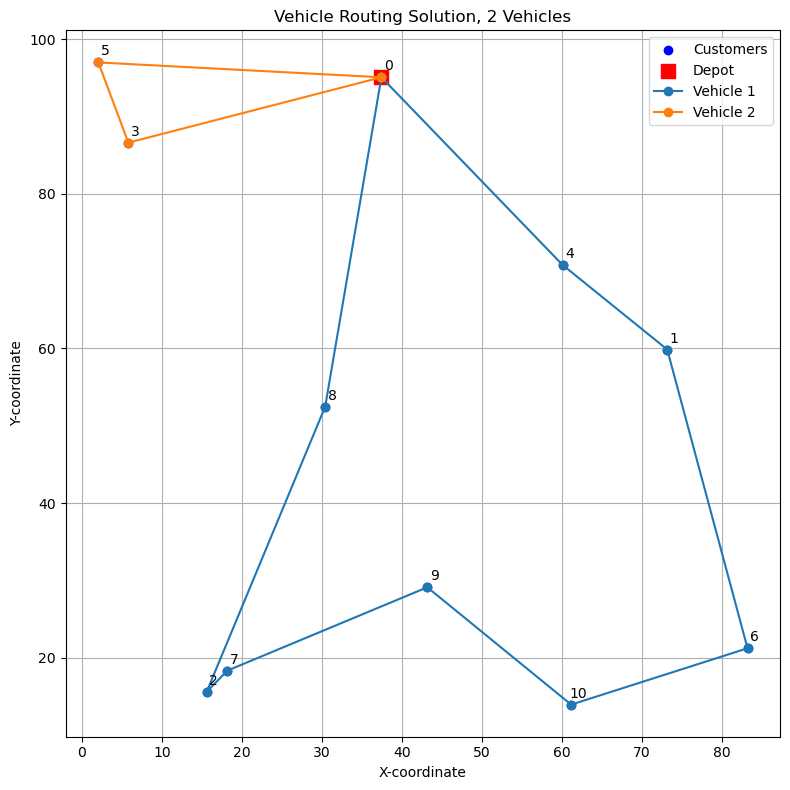

In [3]:
# Define parameters for the VRP instance
parameters = {
    'n_customers': 10,  # Number of customers
    'coordinate_interval': (0, 100), # Range for coordinates
    'demand_interval': (1, 10),     # Range for customer demands
    'vehicle_capacity': 50,         # Capacity of each vehicle
    'num_vehicles': 2               # Number of vehicles available
}

# Instantiate the VehicleRouting problem generator
# Using a seed for reproducibility
seed = 42
vrp_generator = VehicleRouting(parameters, seed=seed)

# Generate VRP instance data
data = vrp_generator.generate_data()

# Build the PuLP model for the VRP
model = vrp_generator.generate_instance(data)

# Solve the VRP model
status, runtime, routes = vrp_generator.solve(model)

print(f"VRP solved with status: {status} in {runtime:.2f} seconds.")

# Plot the routes
if status == 1: # Check if the model was optimally solved (LpStatus.Optimal = 1)
    vrp_generator.plot_routes(data, routes)
else:
    print("Model not solved to optimality, skipping route plotting.")